In [116]:
import polars as pl

In [117]:
df = pl.read_csv("../data/filtered/movies.csv")
df.head()

movie_id,original_id,name,date,tagline,description,minute,theatrical_release_age_rating,rating
i64,i64,str,i64,str,str,i64,str,f64
0,1000001,"""Barbie""",2023,"""She's everything. He's just Ke…","""Barbie and Ken are having the …",114,"""PG-13""",3.86
1,1000004,"""Fight Club""",1999,"""Mischief. Mayhem. Soap.""","""A ticking-time-bomb insomniac …",139,"""R""",4.27
2,1000006,"""Oppenheimer""",2023,"""The world forever changes.""","""The story of J. Robert Oppenhe…",181,"""R""",4.23
3,1000008,"""Joker""",2019,"""Put on a happy face.""","""During the 1980s, a failed sta…",122,"""R""",3.85
4,1000010,"""Pulp Fiction""",1994,"""Just because you are a charact…","""A burger-loving hit man, his p…",154,"""R""",4.26


In [118]:
df.row(1)

(1,
 1000004,
 'Fight Club',
 1999,
 'Mischief. Mayhem. Soap.',
 'A ticking-time-bomb insomniac and a slippery soap salesman channel primal male aggression into a shocking new form of therapy. Their concept catches on, with underground "fight clubs" forming in every town, until an eccentric gets in the way and ignites an out-of-control spiral toward oblivion.',
 139,
 'R',
 4.27)

In [119]:
import matplotlib.pyplot as plt
import numpy as np

def plot_distribution(df, column):
    target_column = df[column].to_numpy()

    plt.figure(figsize=(10, 6))
    plt.hist(target_column, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Movie {column}', fontsize=16, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.3)

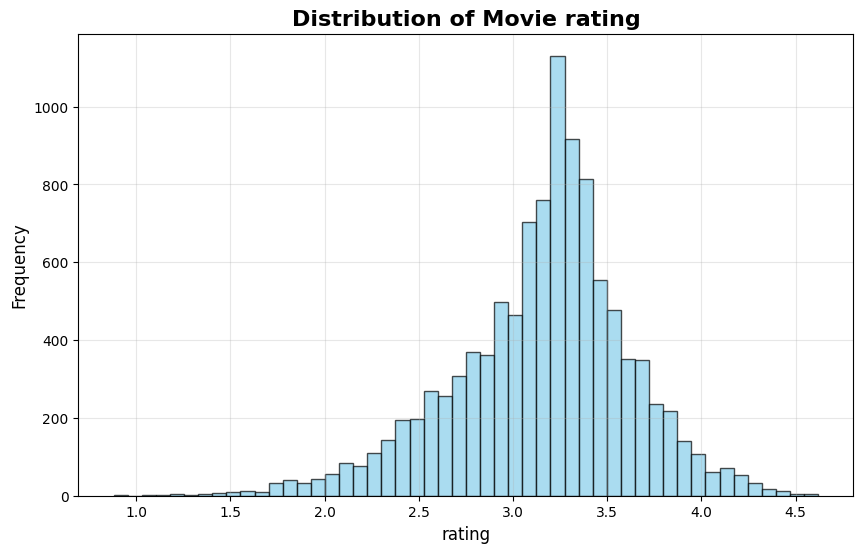

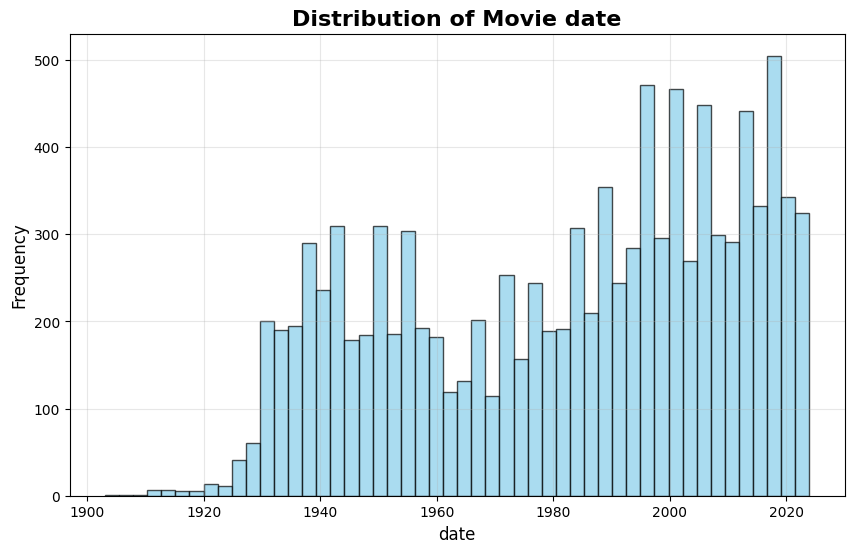

In [120]:
plot_distribution(df, 'rating')
plot_distribution(df, 'date')

In [121]:
YEAR_CUTOFF = 2015

In [122]:
print (f"Number of movies after {YEAR_CUTOFF}: {df['date'].gt(YEAR_CUTOFF).sum()}")
print (f"Mean of movies after {YEAR_CUTOFF}: {df.filter(pl.col('date') >= YEAR_CUTOFF)['rating'].mean()}")
print (f"Mean of movies before {YEAR_CUTOFF}: {df.filter(pl.col('date') < YEAR_CUTOFF)['rating'].mean()}")

Number of movies after 2015: 1350
Mean of movies after 2015: 2.930790697674419
Mean of movies before 2015: 3.1900692764460086


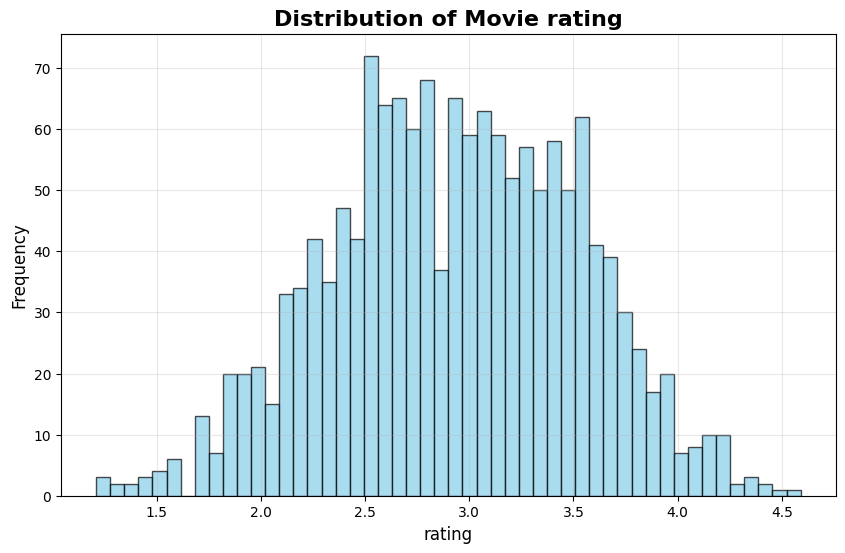

In [123]:
plot_distribution(df.filter(pl.col('date') >= YEAR_CUTOFF), 'rating')

In [124]:
unique_values = df['theatrical_release_age_rating'].unique().sort()
print("Unique age ratings:")
print(unique_values)

Unique age ratings:
shape: (7,)
Series: 'theatrical_release_age_rating' [str]
[
	null
	"G"
	"NC-17"
	"NR"
	"PG"
	"PG-13"
	"R"
]


In [125]:
correlations = df.select([
    pl.corr('rating', 'date').alias('rating_date_corr')
])

print(correlations)


shape: (1, 1)
┌──────────────────┐
│ rating_date_corr │
│ ---              │
│ f64              │
╞══════════════════╡
│ -0.347576        │
└──────────────────┘


### EDA conclusion:
- imbalanced dataset with dominance of 3.-3.5 ratings
- **after cut off year (2015)** there is enough new movies with various ratings that would make use for validation dataset as we want to predict ratings of NEW movies, not just any movie from the past
- no information about how many users rated movie, which explains that probably older movies are viewed by a broader audience and have slightly higher mean rating
- age rating ideally to be converted to numerical value to show order, but we will skip it
- no important features such as actor popularity, director/studio previous movie ratings, etc.

# XGBoost model

[CatBoost](https://github.com/catboost/catboost) is selected for implementation as it natively supports both numerical and Categorical features to make preprocessing and handling easy to use and prototype, also easier to install than LightGBM.

In [126]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from catboost import CatBoostRegressor

In [127]:
# Basic feature engineering and filling missing values
df = df.with_columns([
    pl.col('theatrical_release_age_rating').fill_null('Empty').alias('theatrical_release_age_rating')
])

# Name, tagline and description length and word count
df = df.with_columns([
    pl.col('name').str.len_chars().alias('name_length'),
    pl.col('tagline').str.len_chars().alias('tagline_length'),
    pl.col('tagline').str.split(' ').list.len().alias('tagline_word_count'),
    pl.col('description').str.len_chars().alias('description_length'),
    pl.col('description').str.split(' ').list.len().alias('description_word_count'),

])


In [128]:
df.head()

movie_id,original_id,name,date,tagline,description,minute,theatrical_release_age_rating,rating,name_length,tagline_length,tagline_word_count,description_length,description_word_count
i64,i64,str,i64,str,str,i64,str,f64,u32,u32,u32,u32,u32
0,1000001,"""Barbie""",2023,"""She's everything. He's just Ke…","""Barbie and Ken are having the …",114,"""PG-13""",3.86,6,32,5,229,43
1,1000004,"""Fight Club""",1999,"""Mischief. Mayhem. Soap.""","""A ticking-time-bomb insomniac …",139,"""R""",4.27,10,23,3,295,45
2,1000006,"""Oppenheimer""",2023,"""The world forever changes.""","""The story of J. Robert Oppenhe…",181,"""R""",4.23,11,26,4,100,18
3,1000008,"""Joker""",2019,"""Put on a happy face.""","""During the 1980s, a failed sta…",122,"""R""",3.85,5,20,5,169,29
4,1000010,"""Pulp Fiction""",1994,"""Just because you are a charact…","""A burger-loving hit man, his p…",154,"""R""",4.26,12,65,11,239,36


In [129]:
# Identify categorical features
categorical_features = ['theatrical_release_age_rating']
numerical_features = ['date', 'minute', 'name_length', 'tagline_length', 'description_length', 
                    'tagline_word_count', 'description_word_count']

print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

Categorical features: ['theatrical_release_age_rating']
Numerical features: ['date', 'minute', 'name_length', 'tagline_length', 'description_length', 'tagline_word_count', 'description_word_count']


## Train-val split based on YEAR_CUTOFF

In [130]:
def split_data(df, categorical_features, numerical_features, YEAR_CUTOFF):
    df_train = df.filter(pl.col('date') < YEAR_CUTOFF)
    df_val = df.filter(pl.col('date') >= YEAR_CUTOFF)

    X_train = df_train.select(categorical_features + numerical_features).to_pandas()
    y_train = df_train.select('rating').to_numpy()

    X_val = df_val.select(categorical_features + numerical_features).to_pandas()
    y_val = df_val.select('rating').to_numpy()

    return X_train, y_train, X_val, y_val

In [131]:
X_train, y_train, X_val, y_val = split_data(df, categorical_features, numerical_features, YEAR_CUTOFF)
# todo: make "flat table" to have equal number of ratings in each bin OR have another dataset outside 3-3.5 ratings.

In [ ]:
iterations = [100, 300, 500, 1000, 2000, 3000, 10000]
depths = [3, 5, 7]

rmse_results = []
best_rmse = float('inf')

best_params = {}
best_model = None
percentage_of_35_to_remove = 0.5
for iteration in iterations:
    for depth in depths: 
        catboost_model = CatBoostRegressor(
            iterations=iteration,
            depth=depth,
            learning_rate=0.1,
            l2_leaf_reg=3,
            random_seed=42,
            verbose=False
        )   

        catboost_model.fit(X_train, y_train, cat_features=categorical_features)

        y_pred = catboost_model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        print(f"Iteration: {iteration}, Depth: {depth}, RMSE: {rmse}")
        if rmse < best_rmse:
            best_rmse = rmse
            best_model = catboost_model
            best_params = {
                'iteration': iteration,
                'depth': depth
            }

print(f"Best parameters: {best_params}")
print(f"Best RMSE: {best_rmse}")

Iteration: 100, Depth: 3, RMSE: 0.5232340940169729
Iteration: 100, Depth: 5, RMSE: 0.5206301860199792
Iteration: 100, Depth: 7, RMSE: 0.5200792061806169
Iteration: 300, Depth: 3, RMSE: 0.5226648193924007
Iteration: 300, Depth: 5, RMSE: 0.5226889804264533
Iteration: 300, Depth: 7, RMSE: 0.531519573927597
Iteration: 500, Depth: 3, RMSE: 0.5260891181519123
Iteration: 500, Depth: 5, RMSE: 0.529336545962735
Iteration: 500, Depth: 7, RMSE: 0.5388178522316428
Iteration: 1000, Depth: 3, RMSE: 0.5296979219811068
Iteration: 1000, Depth: 5, RMSE: 0.534981013019327
Iteration: 1000, Depth: 7, RMSE: 0.5513155655964377
Iteration: 2000, Depth: 3, RMSE: 0.5379786111385926
Iteration: 2000, Depth: 5, RMSE: 0.546483422633869
Iteration: 2000, Depth: 7, RMSE: 0.5613359122768681
Iteration: 3000, Depth: 3, RMSE: 0.5434971314328515
Iteration: 3000, Depth: 5, RMSE: 0.556943132321363


In [ ]:
# extra metrics for best model
y_pred = best_model.predict(X_val)
r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"R2: {r2}, \nMAE: {mae}, \nRMSE: {rmse}")

R2: 0.22715968609892934, 
MAE: 0.4173066978471374, 
RMSE: 0.5200792061806169


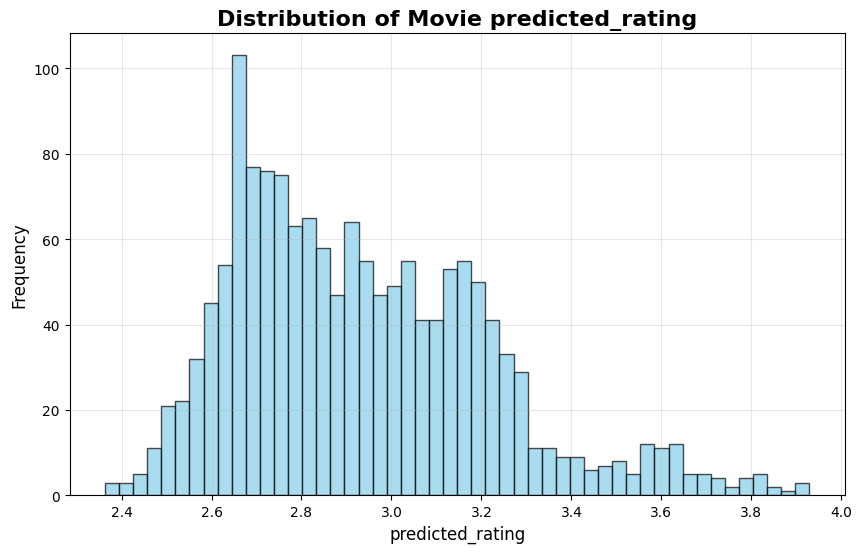

In [ ]:
df_val = df_val.with_columns(pl.Series('predicted_rating', y_pred))
plot_distribution(df_val, 'predicted_rating')

In [ ]:
print(f" min {min(y_pred)}:  max {max(y_pred)}, variance {np.var(y_pred)}") 

 min 2.362952154561032:  max 3.9291402245213147, variance 0.08132091021251332


In [ ]:
# median prediction performance ( random baseline)
y_pred_baseline = [np.median(y_val)] * len(y_val)
r2 = r2_score(y_val, y_pred_baseline)
mae = mean_absolute_error(y_val, y_pred_baseline)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_baseline))
print(f"R2: {r2}, \nMAE: {mae}, \nRMSE: {rmse}")

R2: -1.7863712100663065e-06, 
MAE: 0.48650498338870435, 
RMSE: 0.5915956799242058


## Conclusion

We have slightly better than random model  and has problems with edge parts of rating distribution ->

In [ ]:
df_val = df.filter(pl.col('date') >= 2015)
y_val = df_val.select('rating').to_numpy()
y_pred = best_model.predict(X_val)
df_val2 = df_val.with_columns(pl.Series('predicted_rating', y_pred)).head(10)
df_val2.select('name', 'date', 'rating', 'predicted_rating')

name,date,rating,predicted_rating
str,i64,f64,f64
"""Barbie""",2023,3.86,2.874713
"""Oppenheimer""",2023,4.23,3.516135
"""Joker""",2019,3.85,3.126412
"""Spider-Man: Into the Spider-Ve…",2018,4.42,3.040784
"""The Batman""",2022,3.98,3.278349
"""Knives Out""",2019,3.99,3.112465
"""Poor Things""",2023,4.05,3.440992
"""Spider-Man: Across the Spider-…",2023,4.45,3.361975
"""Spider-Man: No Way Home""",2021,3.84,3.200935
